In [58]:
import requests
url = 'https://apitempo.inmet.gov.br/estacao/2021-06-08/2022-06-08/A201'
resultado = requests.get(url)

In [59]:
import json
dados_org = resultado.json()
dados_str = json.dumps(dados_org)


In [60]:
import pandas as pd
import numpy as np

In [61]:
dados_tabla = pd.read_json(dados_str)
dados_tabla

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,...,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,BELÉM,1008.5,29.2,-1.411228,1008.5,PA,-0.8,22.9,26.2,-48.439512,...,0.2,22.7,26.8,13.1,3.1,28.0,26.8,79.0,A201,0
1,BELÉM,1008.9,29.1,-1.411228,1008.9,PA,-2.6,23.0,26.5,-48.439512,...,0.2,22.8,26.9,13.0,3.2,28.0,26.6,81.0,A201,100
2,BELÉM,1009.6,29.3,-1.411228,1009.6,PA,-3.3,24.2,26.0,-48.439512,...,0.6,23.0,26.6,13.0,4.0,28.0,26.0,90.0,A201,200
3,BELÉM,1009.2,28.9,-1.411228,1009.6,PA,-2.0,24.4,25.4,-48.439512,...,0.4,24.2,26.1,13.0,4.0,27.0,25.4,94.0,A201,300
4,BELÉM,1008.6,28.7,-1.411228,1009.2,PA,-2.0,24.5,25.4,-48.439512,...,1.1,24.4,25.5,13.0,4.3,27.0,25.5,94.0,A201,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,BELÉM,1006.4,31.5,-1.411228,1006.5,PA,709.0,23.6,29.8,-48.439512,...,1.6,22.9,32.2,14.5,4.6,34.0,29.8,69.0,A201,1900
8780,BELÉM,1007.0,29.3,-1.411228,1007.1,PA,158.4,24.2,26.4,-48.439512,...,1.1,23.4,29.9,13.2,6.6,32.0,26.4,88.0,A201,2000
8781,BELÉM,1007.3,28.5,-1.411228,1007.4,PA,38.0,23.6,25.6,-48.439512,...,0.8,23.6,26.4,13.1,3.7,29.0,25.6,89.0,A201,2100
8782,BELÉM,1008.4,28.9,-1.411228,1008.4,PA,2.6,24.0,25.4,-48.439512,...,0.0,23.4,25.7,13.1,2.2,28.0,25.6,91.0,A201,2200


In [62]:
dados = dados_tabla[['DT_MEDICAO', 'HR_MEDICAO', 'TEM_INS', 'UMD_INS', 'RAD_GLO']]
dados

,DT_MEDICAO,HR_MEDICAO,TEM_INS,UMD_INS,RAD_GLO
0,2021-06-08,0,26.8,79.0,-0.8
1,2021-06-08,100,26.6,81.0,-2.6
2,2021-06-08,200,26.0,90.0,-3.3
3,2021-06-08,300,25.4,94.0,-2.0
4,2021-06-08,400,25.5,94.0,-2.0
...,...,...,...,...,...
8779,2022-06-08,1900,29.8,69.0,709.0
8780,2022-06-08,2000,26.4,88.0,158.4
8781,2022-06-08,2100,25.6,89.0,38.0
8782,2022-06-08,2200,25.6,91.0,2.6


# Renomia o titulo do nosso dados

In [63]:
dados.columns = ['DATA','HORARIO', 'TEMPERATURA', 'UMIDADE', 'RADIACAO']

In [64]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO
0,2021-06-08,0,26.8,79.0,-0.8
1,2021-06-08,100,26.6,81.0,-2.6
2,2021-06-08,200,26.0,90.0,-3.3
3,2021-06-08,300,25.4,94.0,-2.0
4,2021-06-08,400,25.5,94.0,-2.0
...,...,...,...,...,...
8779,2022-06-08,1900,29.8,69.0,709.0
8780,2022-06-08,2000,26.4,88.0,158.4
8781,2022-06-08,2100,25.6,89.0,38.0
8782,2022-06-08,2200,25.6,91.0,2.6


<AxesSubplot:title={'center':'TEMPERATURA'}, xlabel='HORARIO'>

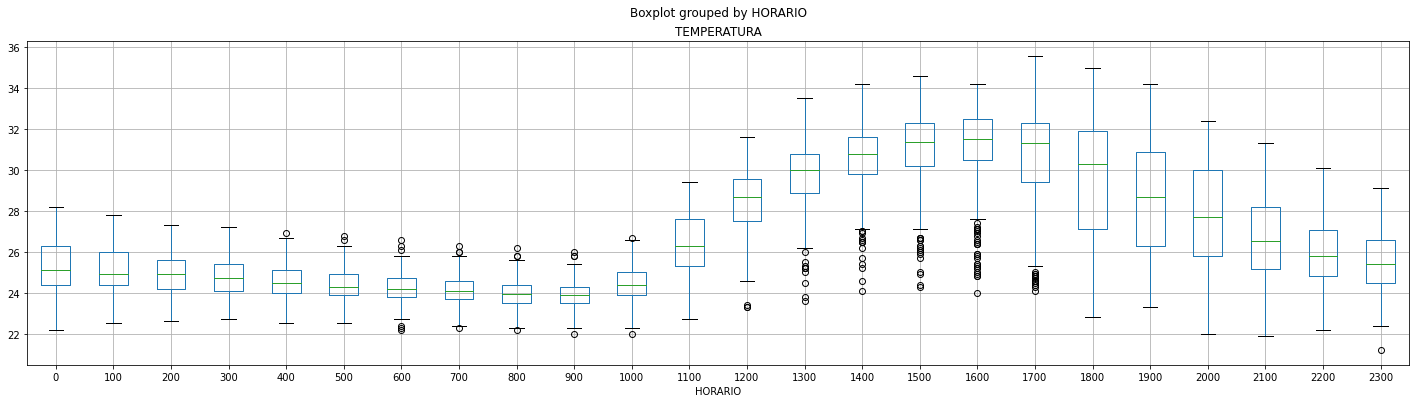

In [65]:
dados.boxplot("TEMPERATURA", by='HORARIO', figsize=(24,6))

<AxesSubplot:title={'center':'UMIDADE'}, xlabel='HORARIO'>

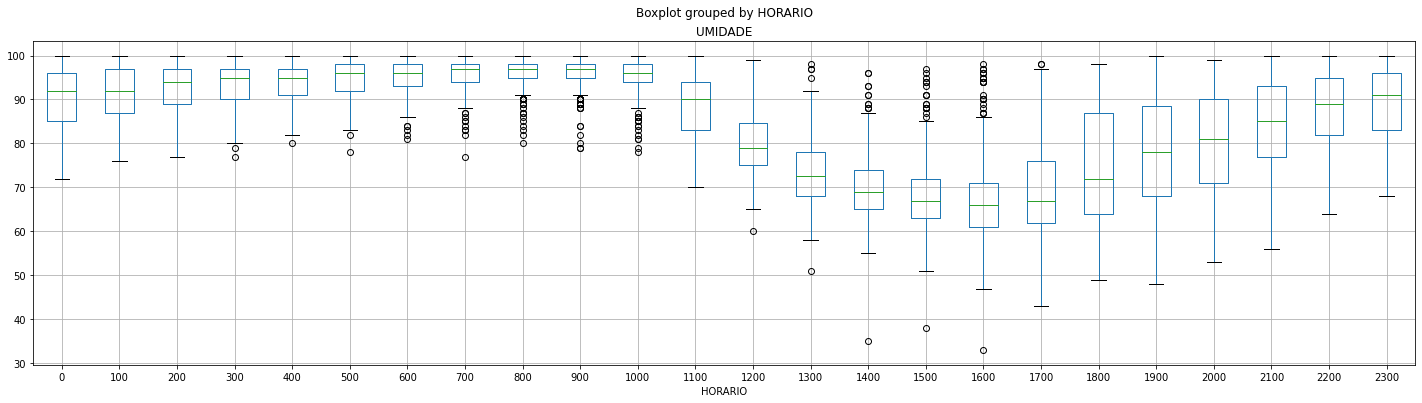

In [66]:
dados.boxplot("UMIDADE", by='HORARIO', figsize=(24,6))

<AxesSubplot:title={'center':'RADIACAO'}, xlabel='HORARIO'>

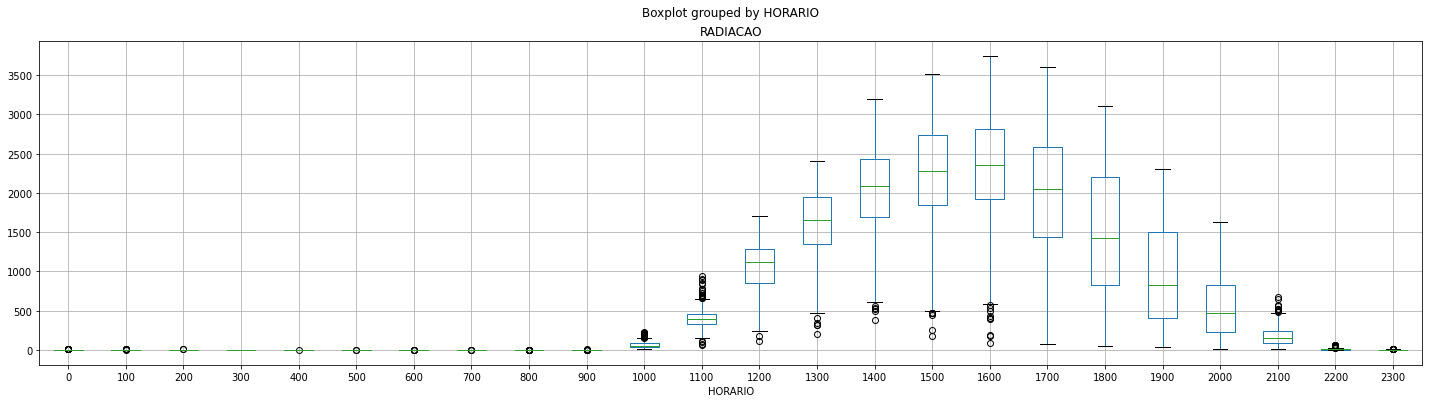

In [67]:
dados.boxplot("RADIACAO", by='HORARIO', figsize=(24,6))

# Verificando a suma de dados null 

In [68]:
dados.apply(pd.isnull).sum()/dados.shape[0]

DATA           0.000000
HORARIO        0.000000
TEMPERATURA    0.010360
UMIDADE        0.033811
RADIACAO       0.010360
dtype: float64

In [69]:
dados[pd.isnull(dados['TEMPERATURA'])]

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO
2696,2021-09-28,800,NaN,NaN,NaN
2697,2021-09-28,900,NaN,NaN,NaN
2698,2021-09-28,1000,NaN,NaN,NaN
2699,2021-09-28,1100,NaN,NaN,NaN
2700,2021-09-28,1200,NaN,NaN,NaN
...,...,...,...,...,...
6407,2022-03-01,2300,NaN,NaN,NaN
6457,2022-03-04,100,NaN,NaN,NaN
6554,2022-03-08,200,NaN,NaN,NaN
6649,2022-03-12,100,NaN,NaN,NaN


In [70]:
dados = dados.fillna(method='ffill')

In [71]:
dados.apply(pd.isnull).sum()/dados.shape[0]

DATA           0.0
HORARIO        0.0
TEMPERATURA    0.0
UMIDADE        0.0
RADIACAO       0.0
dtype: float64

# verificando se nosso dados são numéricos

In [72]:
dados.dtypes

DATA            object
HORARIO          int64
TEMPERATURA    float64
UMIDADE        float64
RADIACAO       float64
dtype: object

<AxesSubplot:>

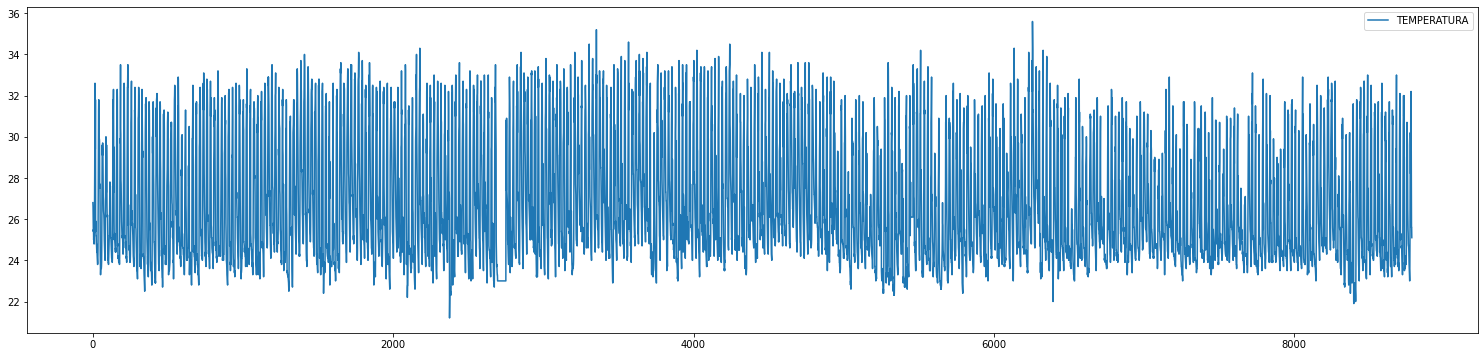

In [73]:
dados[['TEMPERATURA']].plot(figsize=(26,6))

# Agrupando os dados por horário

In [74]:
dados.groupby(dados.HORARIO).sum()

,TEMPERATURA,UMIDADE,RADIACAO
HORARIO,,,
0,9277.5,33030.0,-377.4
100,9206.8,33385.0,-488.9
200,9129.6,33770.0,-578.3
300,9056.1,34113.0,-657.3
400,8985.4,34390.0,-676.1
500,8919.1,34621.0,-703.8
600,8865.4,34815.0,-707.9
700,8813.7,34978.0,-710.5
800,8768.3,35093.0,-717.7


### Criando novos colunas para Temperatura da amahão, Umidade da amahão e Radiação da amahão na tabla  

In [75]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO
0,2021-06-08,0,26.8,79.0,-0.8
1,2021-06-08,100,26.6,81.0,-2.6
2,2021-06-08,200,26.0,90.0,-3.3
3,2021-06-08,300,25.4,94.0,-2.0
4,2021-06-08,400,25.5,94.0,-2.0
...,...,...,...,...,...
8779,2022-06-08,1900,29.8,69.0,709.0
8780,2022-06-08,2000,26.4,88.0,158.4
8781,2022-06-08,2100,25.6,89.0,38.0
8782,2022-06-08,2200,25.6,91.0,2.6


### Criando novos colunas para Temperatura da amahão, Umidade da amahão e Radiação da amahão na tabla 

In [76]:
dados['TEMP_AMANHAO'] = dados.shift(-1)['TEMPERATURA']
dados['TEMP_MES_MIX'] = dados['TEMPERATURA'].rolling(30).mean()

In [77]:
dados['UMID_AMANHAO'] = dados.shift(-1)['UMIDADE']
dados['UMID_MES_MIX'] = dados['UMIDADE'].rolling(30).mean()

In [78]:
dados['RADI_AMANHAO'] = dados.shift(-1)['RADIACAO']
dados['RADI_MES_MIX'] = dados['RADIACAO'].rolling(30).mean()

In [79]:
dados['HORARIO_ATUAL'] = dados.shift(3)['HORARIO']

In [80]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO,TEMP_AMANHAO,TEMP_MES_MIX,UMID_AMANHAO,UMID_MES_MIX,RADI_AMANHAO,RADI_MES_MIX,HORARIO_ATUAL
0,2021-06-08,0,26.8,79.0,-0.8,26.6,NaN,81.0,NaN,-2.6,NaN,NaN
1,2021-06-08,100,26.6,81.0,-2.6,26.0,NaN,90.0,NaN,-3.3,NaN,NaN
2,2021-06-08,200,26.0,90.0,-3.3,25.4,NaN,94.0,NaN,-2.0,NaN,NaN
3,2021-06-08,300,25.4,94.0,-2.0,25.5,NaN,94.0,NaN,-2.0,NaN,0.0
4,2021-06-08,400,25.5,94.0,-2.0,25.0,NaN,97.0,NaN,-1.6,NaN,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2022-06-08,1900,29.8,69.0,709.0,26.4,26.960000,88.0,82.566667,158.4,967.646667,1600.0
8780,2022-06-08,2000,26.4,88.0,158.4,25.6,26.870000,89.0,83.033333,38.0,892.953333,1700.0
8781,2022-06-08,2100,25.6,89.0,38.0,25.6,26.700000,91.0,83.633333,2.6,798.586667,1800.0
8782,2022-06-08,2200,25.6,91.0,2.6,25.1,26.553333,93.0,84.166667,-2.5,706.776667,1900.0


### Deletando NULL

In [81]:
dados = dados.iloc[30:,:].copy()
dados = dados.iloc[:-1, :].copy()

In [82]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO,TEMP_AMANHAO,TEMP_MES_MIX,UMID_AMANHAO,UMID_MES_MIX,RADI_AMANHAO,RADI_MES_MIX,HORARIO_ATUAL
30,2021-06-09,600,24.0,100.0,-2.2,23.8,26.286667,100.0,90.666667,-2.3,388.290000,300.0
31,2021-06-09,700,23.8,100.0,-2.3,23.8,26.193333,100.0,91.300000,-1.8,388.300000,400.0
32,2021-06-09,800,23.8,100.0,-1.8,23.9,26.120000,100.0,91.633333,-1.1,388.350000,500.0
33,2021-06-09,900,23.9,100.0,-1.1,24.6,26.070000,100.0,91.833333,72.0,388.380000,600.0
34,2021-06-09,1000,24.6,100.0,72.0,26.5,26.040000,94.0,92.033333,483.1,390.846667,700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8778,2022-06-08,1800,32.2,58.0,2455.7,29.8,26.933333,69.0,82.666667,709.0,1012.166667,1500.0
8779,2022-06-08,1900,29.8,69.0,709.0,26.4,26.960000,88.0,82.566667,158.4,967.646667,1600.0
8780,2022-06-08,2000,26.4,88.0,158.4,25.6,26.870000,89.0,83.033333,38.0,892.953333,1700.0
8781,2022-06-08,2100,25.6,89.0,38.0,25.6,26.700000,91.0,83.633333,2.6,798.586667,1800.0


In [83]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1, solver='auto', fit_intercept=True, max_iter=None, tol=0.001, copy_X=True)

In [84]:
from sklearn.metrics import mean_absolute_percentage_error

In [85]:
numerio_de_dados = len(dados)+9

In [86]:
def criar_previsões_temp(preditores, dados, reg):
    trinar = dados.loc[:numerio_de_dados]
    teste = dados.loc[numerio_de_dados:]
    reg.fit(trinar[preditores], trinar["TEMP_AMANHAO"])
    preditores = reg.predict(teste[preditores])
    erro = mean_absolute_percentage_error(teste["TEMP_AMANHAO"],preditores)
    conjunto = pd.concat([teste['TEMP_AMANHAO'], pd.Series(preditores, index=teste.index )], axis=1)
    conjunto.columns = ['ATUAL_TEMPERATURA', 'PREVISOES_TEMPERATURA']
    conjunto[['DATA','HORARIO']] = teste[['DATA','HORARIO_ATUAL']]
    return erro, conjunto

In [87]:
def criar_previsões_umid(preditores, dados, reg):
    trinar = dados.loc[:numerio_de_dados]
    teste = dados.loc[numerio_de_dados:]
    reg.fit(trinar[preditores], trinar["UMID_AMANHAO"])
    preditores = reg.predict(teste[preditores])
    erro = mean_absolute_percentage_error(teste["UMID_AMANHAO"],preditores)
    conjunto = pd.concat([teste["UMID_AMANHAO"], pd.Series(preditores, index=teste.index)], axis=1)
    conjunto.columns = ["ATUAL_UMIDADE", "PREVISOES_UMIDADE"]
    return erro, conjunto

In [88]:
def criar_previsões_radi(preditores, dados, reg):
    trinar = dados.loc[:numerio_de_dados]
    teste = dados.loc[numerio_de_dados:]
    reg.fit(trinar[preditores], trinar["RADI_AMANHAO"])
    preditores = reg.predict(teste[preditores])
    erro = mean_absolute_percentage_error(teste["RADI_AMANHAO"],preditores)
    conjunto = pd.concat([teste["RADI_AMANHAO"], pd.Series(preditores, index=teste.index)], axis=1)
    conjunto.columns = ["ATUAL_RADIACAO", "PREVISOES_RADIACAO"]
    return erro, conjunto

In [89]:
preditores = ['HORARIO', 'TEMPERATURA','UMIDADE', 'RADIACAO','TEMP_MES_MIX', 'UMID_MES_MIX','RADI_MES_MIX']

In [90]:
temp_erro, temp_prevesao = criar_previsões_temp(preditores, dados, reg)

In [91]:
umid_erro, umid_prevesao = criar_previsões_umid(preditores, dados, reg)

In [92]:
radi_erro, radi_prevesao = criar_previsões_radi(preditores, dados, reg)

In [93]:
previsoes_dados = temp_prevesao

In [94]:
previsoes_dados[["ATUAL_UMIDADE", "PREVISOES_UMIDADE"]] = umid_prevesao[["ATUAL_UMIDADE", "PREVISOES_UMIDADE"]]

In [95]:
previsoes_dados

,ATUAL_TEMPERATURA,PREVISOES_TEMPERATURA,DATA,HORARIO,ATUAL_UMIDADE,PREVISOES_UMIDADE
8762,24.5,24.505429,2022-06-08,2300.0,92.0,91.787148
8763,24.1,24.378011,2022-06-08,0.0,94.0,93.173112
8764,23.8,24.096014,2022-06-08,100.0,96.0,94.595927
8765,23.6,23.898243,2022-06-08,200.0,97.0,95.952933
8766,23.4,23.760849,2022-06-08,300.0,98.0,96.645267
8767,23.2,23.621434,2022-06-08,400.0,98.0,97.349533
8768,23.0,23.453605,2022-06-08,500.0,98.0,97.469493
8769,23.7,23.286355,2022-06-08,600.0,98.0,97.582019
8770,25.3,23.939139,2022-06-08,700.0,90.0,96.859934
8771,28.2,25.370556,2022-06-08,800.0,77.0,89.925197


In [96]:
previsoes_dados[["ATUAL_RADIACAO", "PREVISOES_RADIACAO"]] = radi_prevesao[["ATUAL_RADIACAO", "PREVISOES_RADIACAO"]]

In [97]:
previsoes_dados = previsoes_dados[['DATA','HORARIO','ATUAL_TEMPERATURA','PREVISOES_TEMPERATURA','ATUAL_UMIDADE','PREVISOES_UMIDADE','ATUAL_RADIACAO','PREVISOES_RADIACAO']]

In [98]:
previsoes_dados.to_csv('garoa.csv', index=False)

In [99]:
umid_erro

0.06085237499003554

In [100]:
temp_erro

0.03589816460642752

In [101]:
radi_erro

3.7507288574467177

<AxesSubplot:title={'center':'PREVISOES_TEMPERATURA'}, xlabel='HORARIO'>

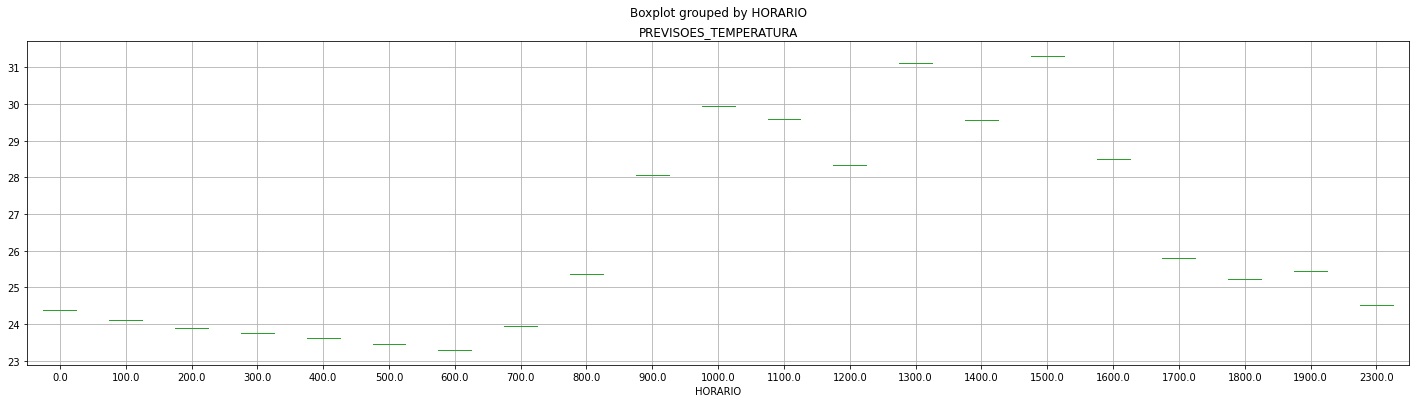

In [102]:
previsoes_dados.boxplot("PREVISOES_TEMPERATURA", by='HORARIO', figsize=(24,6))

<AxesSubplot:title={'center':'PREVISOES_UMIDADE'}, xlabel='HORARIO'>

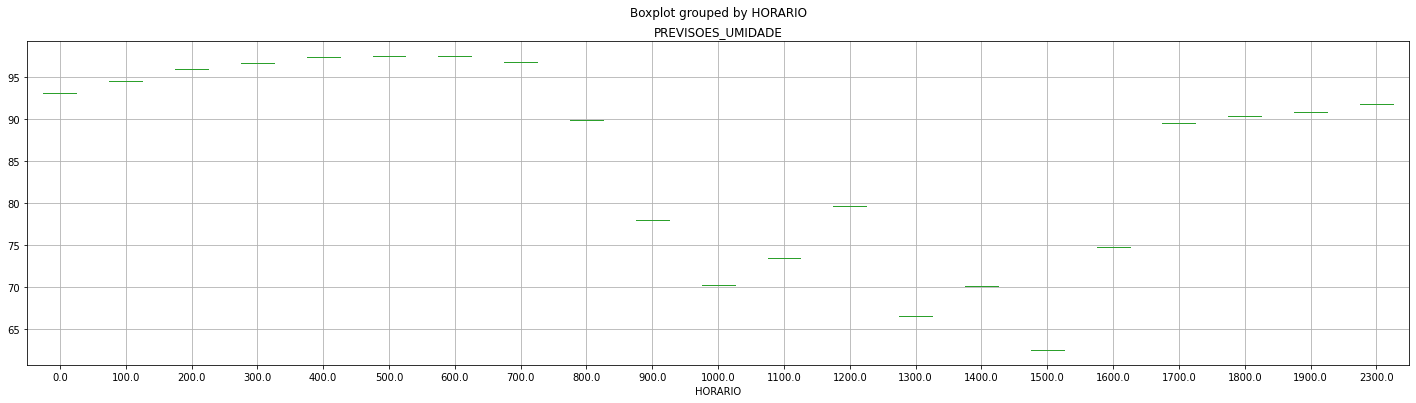

In [103]:
previsoes_dados.boxplot("PREVISOES_UMIDADE", by='HORARIO', figsize=(24,6))


<AxesSubplot:title={'center':'PREVISOES_RADIACAO'}, xlabel='HORARIO'>

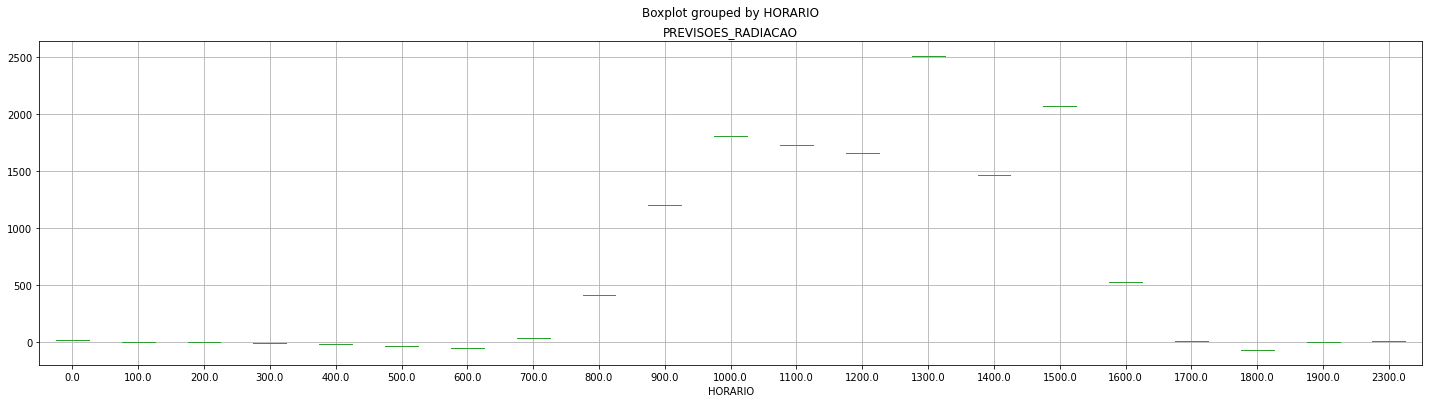

In [104]:
previsoes_dados.boxplot("PREVISOES_RADIACAO", by='HORARIO', figsize=(24,6))